In [38]:
import fiona
import rasterio
import rasterio.mask
from glob import glob
import pandas as pd
from osgeo import gdal

In [25]:
folder= '/hydros/MengyuChen/mrmsPrecRate/*.tif'
fnames= glob(folder)

In [26]:
dr= pd.date_range('20170401', '20170901', freq='120S')

In [27]:
with fiona.open('68500_sub/68500_basin.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [28]:
RR= []
for date in dr:
    fname= date.strftime('/hydros/MengyuChen/mrmsPrecRate/PrecipRate_00.00_%Y%m%d-%H%M%S.grib2-var0-z0.tif')

    try:
        with rasterio.open(fname) as src:
            out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
            out_meta = src.meta
            out_image[out_image<0]= np.nan
            RR.append(np.nanmean(out_image))
    except:
        RR.append(np.nan)

/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [45]:
date= pd.to_datetime('201708120422')

In [46]:
fname=date.strftime('/hydros/MengyuChen/mrmsPrecRate/PrecipRate_00.00_%Y%m%d-%H%M%S.grib2-var0-z0.tif')

In [47]:
with rasterio.open(fname) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta  
    out_image[out_image<0]= np.nan
    print np.nanmean(out_image)

inf


In [52]:
np.isinf(np.nanmean(out_image))

True

/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/matplotlib/image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/matplotlib/image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/matplotlib/colors.py:919: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data 

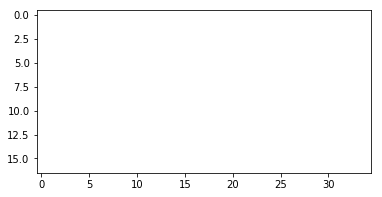

In [48]:

plt.imshow(out_image.squeeze())

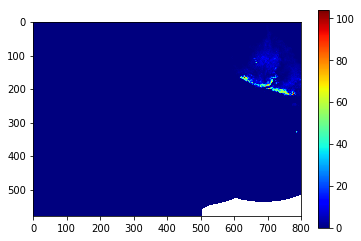

In [76]:
arr= gdal.Open(fnames[55400]).ReadAsArray()
arr[arr<0]= np.nan
plt.imshow(arr, cmap='jet')
plt.colorbar()